In [1]:
# Import Libraries

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression()


In [3]:
# Load Cleaned Dataset

df = pd.read_csv('heart_disease_cleaned.csv')
df

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,target,thal_encoded
0,0,67,1,0,176.0,148.0,1,0,137.5,1,5.6,3,3,0.0,0
1,1,57,1,1,155.0,551.0,0,1,98.0,1,3.2,2,4,0.0,0
2,2,43,1,0,125.0,519.0,1,0,113.0,1,3.2,1,4,1.0,2
3,3,71,0,0,123.0,285.0,0,2,156.0,0,6.2,3,1,1.0,2
4,4,36,0,0,122.0,488.0,1,1,137.5,1,3.3,3,1,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448,494,38,0,0,153.0,539.0,1,1,91.0,0,4.7,3,4,0.0,2
449,495,47,1,1,147.0,239.0,1,2,105.0,1,2.9,2,1,0.0,2
450,496,60,1,2,98.0,270.0,1,0,100.0,1,5.4,1,0,0.0,2
451,497,29,1,2,138.0,353.5,1,0,127.0,0,1.3,2,1,0.0,2


In [4]:
# Drop index column 

df = df.drop(columns=['Unnamed: 0'], errors='ignore')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,target,thal_encoded
0,67,1,0,176.0,148.0,1,0,137.5,1,5.6,3,3,0.0,0
1,57,1,1,155.0,551.0,0,1,98.0,1,3.2,2,4,0.0,0
2,43,1,0,125.0,519.0,1,0,113.0,1,3.2,1,4,1.0,2
3,71,0,0,123.0,285.0,0,2,156.0,0,6.2,3,1,1.0,2
4,36,0,0,122.0,488.0,1,1,137.5,1,3.3,3,1,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448,38,0,0,153.0,539.0,1,1,91.0,0,4.7,3,4,0.0,2
449,47,1,1,147.0,239.0,1,2,105.0,1,2.9,2,1,0.0,2
450,60,1,2,98.0,270.0,1,0,100.0,1,5.4,1,0,0.0,2
451,29,1,2,138.0,353.5,1,0,127.0,0,1.3,2,1,0.0,2


In [5]:
# Prepare Features and Target

X = df.drop(columns=['target'])
y = df['target']

In [6]:
from sklearn.preprocessing import StandardScaler

num_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])

In [7]:
# Train-Test Split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Check class distribution
print(y.value_counts())

# Check class distribution in percentage
print("\nClass Distribution (in %):\n", y.value_counts(normalize=True) * 100)


target
0.0    238
1.0    215
Name: count, dtype: int64

Class Distribution (in %):
 target
0.0    52.538631
1.0    47.461369
Name: proportion, dtype: float64


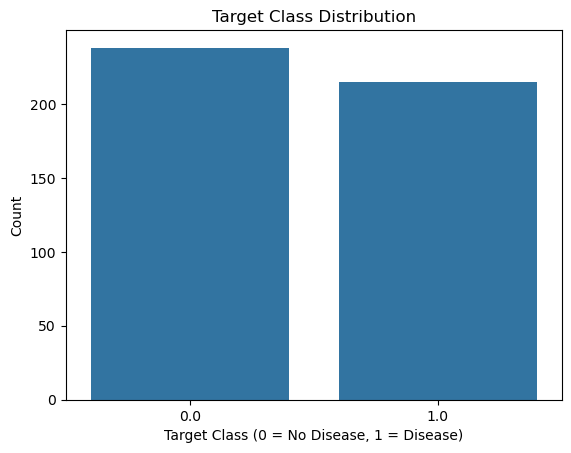

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=y)
plt.title('Target Class Distribution')
plt.xlabel('Target Class (0 = No Disease, 1 = Disease)')
plt.ylabel('Count')
plt.show()

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=y)
plt.title('Target Class Distribution')
plt.xlabel('Target Class (0 = No Disease, 1 = Disease)')
plt.ylabel('Count')
plt.show()

RandomForestClassifier(n_estimators=150, random_state=42)

In [11]:
# Predict and Accuracy
log_acc = accuracy_score(y_test, log_model.predict(X_test))
tree_acc = accuracy_score(y_test, tree_model.predict(X_test))
forest_acc = accuracy_score(y_test, forest_model.predict(X_test))

print("Model Accuracies:")
print(f"Logistic Regression Accuracy: {log_acc*100}%")
print(f"Decision Tree Accuracy: {tree_acc*100}%")
print(f"Random Forest Accuracy: {forest_acc*100}%")

Model Accuracies:
Logistic Regression Accuracy: 53.84615384615385%
Decision Tree Accuracy: 56.043956043956044%
Random Forest Accuracy: 50.54945054945055%


In [12]:
# User Input for Prediction
print("\n Enter patient details to predict heart disease:")

input_data = {
    'age': float(input("Enter Age: ")),
    'sex': int(input("Enter Sex (1=Male, 0=Female): ")),
    'cp': int(input("Enter Chest Pain Type (0-3): ")),
    'trestbps': float(input("Enter Resting Blood Pressure: ")),
    'chol': float(input("Enter Cholesterol: ")),
    'fbs': int(input("Fasting Blood Sugar > 120 mg/dl (1=True, 0=False): ")),
    'restecg': int(input("Resting ECG results (0-2): ")),
    'thalach': float(input("Enter Max Heart Rate Achieved: ")),
    'exang': int(input("Exercise Induced Angina (1=Yes, 0=No): ")),
    'oldpeak': float(input("Enter ST depression: ")),
    'slope': int(input("Slope of ST segment (1-3): ")),
    'ca': int(input("Number of Major Vessels (0-3): ")),
    'thal_encoded': int(input("Thal (0=Fixed, 1=Normal, 2=Reversible): "))
}

# Convert Input to DataFrame
user_df = pd.DataFrame([input_data])

# Predict Using All Models
log_pred = log_model.predict(user_df)[0]
tree_pred = tree_model.predict(user_df)[0]
forest_pred = forest_model.predict(user_df)[0]

# Show Predictions
print(" Model Predictions:")
print("Logistic Regression:", "Heart Disease" if log_pred == 1 else "No Heart Disease")
print("Decision Tree:", "Heart Disease" if tree_pred == 1 else "No Heart Disease")
print("Random Forest:", "Heart Disease" if forest_pred == 1 else "No Heart Disease")


 Enter patient details to predict heart disease:


Enter Age:  30
Enter Sex (1=Male, 0=Female):  1
Enter Chest Pain Type (0-3):  2
Enter Resting Blood Pressure:  120
Enter Cholesterol:  280
Fasting Blood Sugar > 120 mg/dl (1=True, 0=False):  1
Resting ECG results (0-2):  2
Enter Max Heart Rate Achieved:  150
Exercise Induced Angina (1=Yes, 0=No):  1
Enter ST depression:  1.5
Slope of ST segment (1-3):  1
Number of Major Vessels (0-3):  2
Thal (0=Fixed, 1=Normal, 2=Reversible):  2


 Model Predictions:
Logistic Regression: No Heart Disease
Decision Tree: Heart Disease
Random Forest: No Heart Disease


In [13]:
import pickle

# Save all 3 trained models as .pkl files
pickle.dump(log_model, open("log_model.pkl", "wb"))
pickle.dump(tree_model, open("tree_model.pkl", "wb"))
pickle.dump(forest_model, open("forest_model.pkl", "wb"))
